In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_parquet("train_dataset_hackaton2023_train.gzip")

In [4]:
df.head()

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны


In [5]:
df.describe()

,customer_id,date_diff_post,buy_post,revenue,startdatetime,ownareaall_sqm
count,1.212938e+07,9.660867e+06,1.212938e+07,1.212938e+07,12129384,1.212938e+07
mean,1.980954e+07,2.048039e+01,7.964846e-01,1.067995e+02,2023-02-20 12:19:13.394691,2.155130e+02
min,2.989100e+04,0.000000e+00,0.000000e+00,1.000000e-02,2022-09-02 00:00:39,0.000000e+00
25%,1.010852e+07,8.000000e+00,1.000000e+00,4.499000e+01,2022-12-06 16:12:06,1.049000e+02
50%,2.127459e+07,1.700000e+01,1.000000e+00,7.998000e+01,2023-02-22 11:04:22,2.104000e+02
75%,2.803856e+07,3.000000e+01,1.000000e+00,1.317725e+02,2023-05-09 18:48:02,3.000000e+02
max,4.666180e+07,6.000000e+01,1.000000e+00,1.449971e+04,2023-08-01 23:57:46,9.787000e+02
std,1.138904e+07,1.527091e+01,4.026126e-01,1.074385e+02,NaN,1.225907e+02


In [27]:
# Получаем информацию о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12129384 entries, 0 to 24261978
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   customer_id     int64         
 1   date_diff_post  float64       
 2   buy_post        int64         
 3   group_name      object        
 4   revenue         float64       
 5   startdatetime   datetime64[us]
 6   dish_name       object        
 7   ownareaall_sqm  float64       
 8   format_name     object        
dtypes: datetime64[us](1), float64(3), int64(2), object(3)
memory usage: 925.4+ MB
None


In [44]:
# Добавим новые признаки
df['month'] = df['startdatetime'].dt.month
df['hour'] = df['startdatetime'].dt.hour
df['day_of_week'] = df['startdatetime'].dt.dayofweek

In [29]:
# Получаем информацию о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12129384 entries, 0 to 24261978
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   customer_id     int64         
 1   date_diff_post  float64       
 2   buy_post        int64         
 3   group_name      object        
 4   revenue         float64       
 5   startdatetime   datetime64[us]
 6   dish_name       object        
 7   ownareaall_sqm  float64       
 8   format_name     object        
 9   month           int32         
 10  hour            int32         
 11  day_of_week     int32         
dtypes: datetime64[us](1), float64(3), int32(3), int64(2), object(3)
memory usage: 1.0+ GB
None


In [15]:
df

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,month,hour,day_of_week
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны,12,12,0
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны,12,12,0
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны,12,12,0
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны,12,12,0
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны,12,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24261974,46661804,NaN,0,train,7.99,2023-08-01 18:04:56,"Эвервесс Кола джун 0,3л",300.0,Фудкорт с туалетом,8,18,1
24261975,46661804,NaN,0,train,84.98,2023-08-01 18:04:56,Воппер Джуниор,300.0,Фудкорт с туалетом,8,18,1
24261976,46661804,NaN,0,train,70.03,2023-08-01 18:04:56,Наггетсы (3 шт.),300.0,Фудкорт с туалетом,8,18,1
24261977,46661804,NaN,0,train,19.00,2023-08-01 18:04:56,Сырные Медальоны (3 шт.),300.0,Фудкорт с туалетом,8,18,1


Обнаружение и обработка пропусков важны, так как неполные данные могут исказить результаты анализа и классификации. Проанализируем признаки, чтобы определить, сколько недостающих значений присутствует в каждом из них. И затем заполним пропуски.

In [14]:
# Проверить наличие пропусков
missing_values = df.isnull().sum()
print("\nПропуски:")
print(missing_values)


Пропуски:
customer_id             0
date_diff_post    2468517
buy_post                0
group_name              0
revenue                 0
startdatetime           0
dish_name               0
ownareaall_sqm          0
format_name             0
month                   0
hour                    0
day_of_week             0
dtype: int64


In [ ]:
#НАДО ЗАПОЛНИТЬ ПРОПУСКИ

# БАЛАНС КЛАССОВ

In [21]:
#подсчет количества экземпляров каждого класса в целевой переменной
buy_counts = df['buy_post'].value_counts()
print(buy_counts[0]/buy_counts[1])
print(buy_counts)


0.255517129052703
buy_post
1    9660867
0    2468517
Name: count, dtype: int64


# распределение

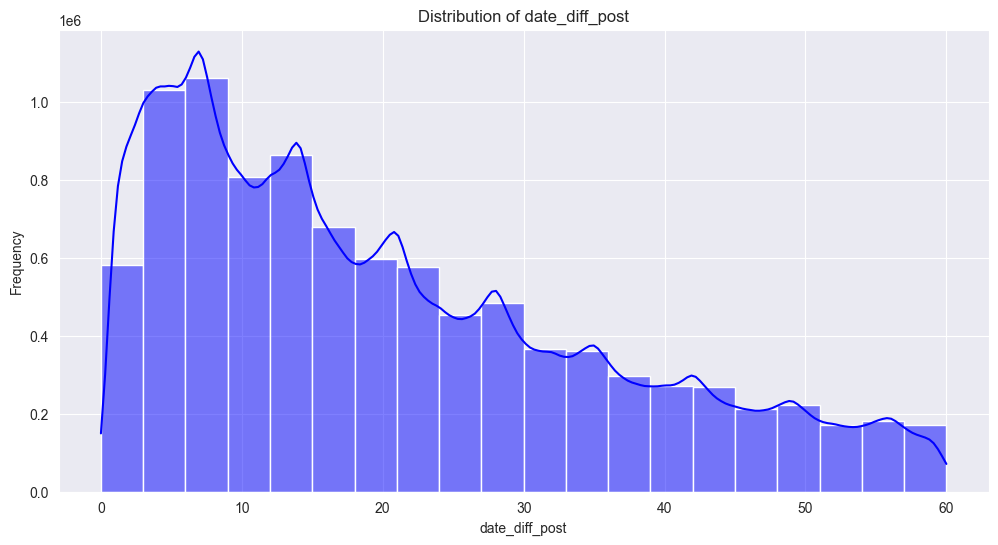

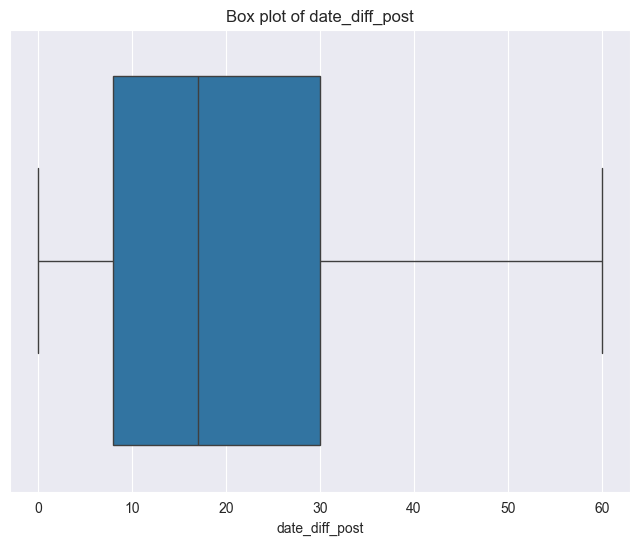

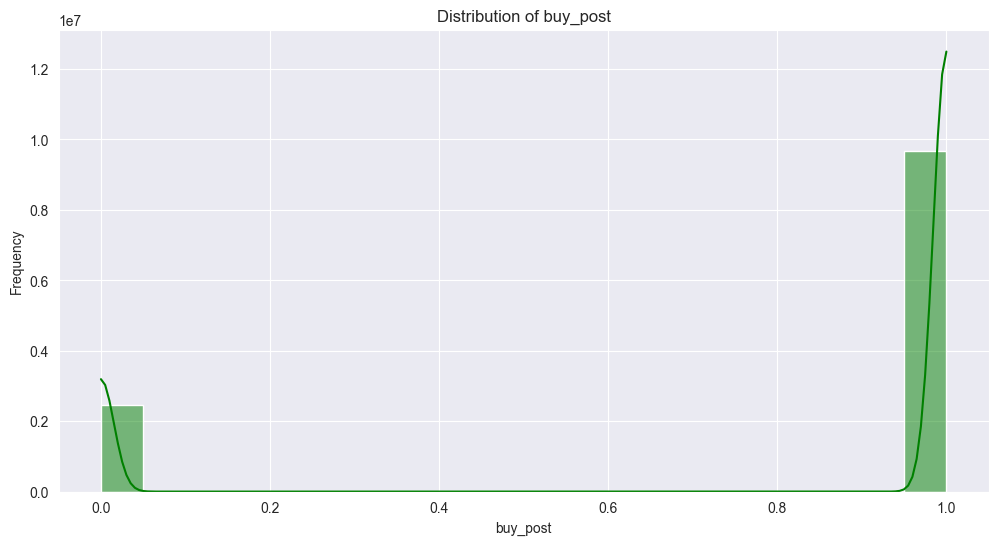

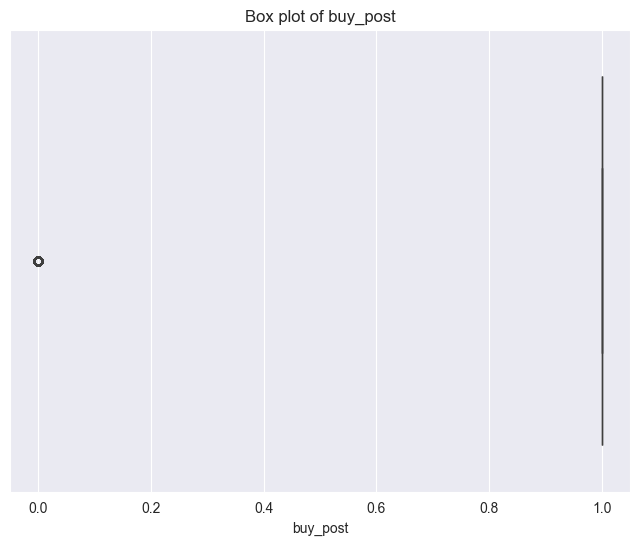

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Распределение целевого признака date_diff_post
plt.figure(figsize=(12, 6))
sns.histplot(df['date_diff_post'], bins=20, kde=True, color='blue')
plt.title('Distribution of date_diff_post')
plt.xlabel('date_diff_post')
plt.ylabel('Frequency')
plt.show()

# Ящик с усами для целевого признака date_diff_post
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['date_diff_post'])
plt.title('Box plot of date_diff_post')
plt.show()

# Распределение целевого признака buy_post
plt.figure(figsize=(12, 6))
sns.histplot(df['buy_post'], bins=20, kde=True, color='green')
plt.title('Distribution of buy_post')
plt.xlabel('buy_post')
plt.ylabel('Frequency')
plt.show()

# Ящик с усами для целевого признака buy_post
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['buy_post'])
plt.title('Box plot of buy_post')
plt.show()


Распределение целевых признаков предоставляет информацию о структуре данных и их характеристиках.

 медиана в ящике с усами покажет, где находится центр распределения.

Разброс данных:
Размах и длина ящика могут указать на разброс данных. Это может быть полезно для оценки диапазона значений и наличия выбросов.

Выбросы:
Точки за пределами ящика считаются выбросами. Их обнаружение может быть важным при решении о том, следует ли исключить или обработать эти значения.

Форма распределения

Частота значений:
Гистограмма позволяет оценить, как часто встречаются различные значения.

На основе этих аспектов можно принимать решения относительно предобработки данных, выявления выбросов, выбора подходящих методов анализа и построения моделей машинного обучения.

#### Данные не сбалансированы!!
SMOTE? oversample? Веса?

# Блюда в цифры

In [46]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# dish_name в числовой формат
df['dish_name'] = label_encoder.fit_transform(df['dish_name'])

print(df.info())

# соответствия чисел и блюд
encoded_dishes = pd.DataFrame({
    'dish_name_encoded': df['dish_name'].unique(),
    'dish_name': label_encoder.inverse_transform(df['dish_name'].unique())
})

print(encoded_dishes)


<class 'pandas.core.frame.DataFrame'>
Index: 12129384 entries, 0 to 24261978
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   customer_id     int64         
 1   date_diff_post  float64       
 2   buy_post        int64         
 3   group_name      int32         
 4   revenue         float64       
 5   startdatetime   datetime64[us]
 6   dish_name       int32         
 7   ownareaall_sqm  float64       
 8   format_name     int32         
 9   month           int32         
 10  hour            int32         
 11  day_of_week     int32         
dtypes: datetime64[us](1), float64(3), int32(6), int64(2)
memory usage: 925.4 MB
None
      dish_name_encoded                          dish_name
0                   589                     Кинг Фри станд
1                   982                      Чикен Тар-Тар
2                   900                        Соус Сырный
3                  1035         Энергет.нап. Адреналин Раш
4    

In [39]:
df.head()

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,month,hour,day_of_week
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,589,300.0,Отдельно стоящий без внешней зоны,12,12,0
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,982,300.0,Отдельно стоящий без внешней зоны,12,12,0
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,900,300.0,Отдельно стоящий без внешней зоны,12,12,0
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,1035,300.0,Отдельно стоящий без внешней зоны,12,12,0
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,625,300.0,Отдельно стоящий без внешней зоны,12,14,0


In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['group_name'] = label_encoder.fit_transform(df['group_name'])
df['format_name'] = label_encoder.fit_transform(df['format_name'])


print(df['group_name'].unique())

print(df['format_name'].unique())
for original, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{encoded}: {original}")

print(df.info())


[0]
[2 6 7 3 8 4 1 5 0]
0: Не заполнено
1: Отдельно стоящий
2: Отдельно стоящий без внешней зоны
3: Отдельно стоящий без внешней зоны без туалета
4: Отдельно стоящий без туалета
5: Отдельно стоящий с внешн.зоной без туалета
6: Отдельно стоящий с внешней зоной
7: Фудкорт без туалета
8: Фудкорт с туалетом
<class 'pandas.core.frame.DataFrame'>
Index: 12129384 entries, 0 to 24261978
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   customer_id     int64         
 1   date_diff_post  float64       
 2   buy_post        int64         
 3   group_name      int32         
 4   revenue         float64       
 5   startdatetime   datetime64[us]
 6   dish_name       object        
 7   ownareaall_sqm  float64       
 8   format_name     int32         
 9   month           int32         
 10  hour            int32         
 11  day_of_week     int32         
dtypes: datetime64[us](1), float64(3), int32(5), int64(2), object(1)
memory usage

In [56]:
df = df.drop(columns=['group_name'])

# Корреляция

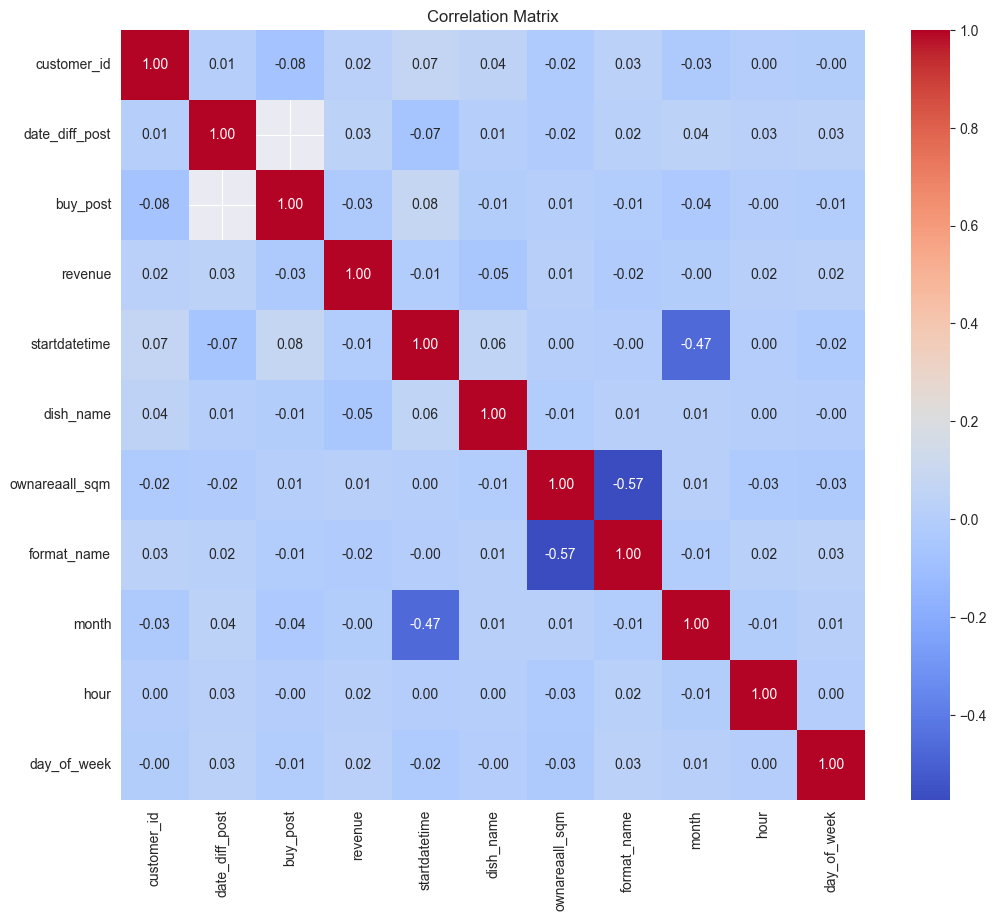

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# корреляци
correlation_m = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_m, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [58]:
correlation_m

,customer_id,date_diff_post,buy_post,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,month,hour,day_of_week
customer_id,1.000000,0.008563,-0.075547,0.023711,0.072736,0.042081,-0.024211,0.030805,-0.030461,0.001398,-0.003962
date_diff_post,0.008563,1.000000,NaN,0.034748,-0.066228,0.009474,-0.019564,0.020679,0.036071,0.027006,0.029957
buy_post,-0.075547,NaN,1.000000,-0.030912,0.078634,-0.007876,0.007663,-0.012073,-0.038248,-0.002230,-0.011474
revenue,0.023711,0.034748,-0.030912,1.000000,-0.011152,-0.049096,0.011853,-0.017812,-0.004558,0.015699,0.022248
startdatetime,0.072736,-0.066228,0.078634,-0.011152,1.000000,0.055549,0.004382,-0.000858,-0.466418,0.002583,-0.024417
dish_name,0.042081,0.009474,-0.007876,-0.049096,0.055549,1.000000,-0.011385,0.012609,0.010739,0.004971,-0.001401
ownareaall_sqm,-0.024211,-0.019564,0.007663,0.011853,0.004382,-0.011385,1.000000,-0.574379,0.009985,-0.026388,-0.032468
format_name,0.030805,0.020679,-0.012073,-0.017812,-0.000858,0.012609,-0.574379,1.000000,-0.010485,0.020876,0.030109
month,-0.030461,0.036071,-0.038248,-0.004558,-0.466418,0.010739,0.009985,-0.010485,1.000000,-0.008574,0.013970
hour,0.001398,0.027006,-0.002230,0.015699,0.002583,0.004971,-0.026388,0.020876,-0.008574,1.000000,0.001200


Таргет оттока имеет некоторую корреляцию с временем (месяц и час).

# БАЛАНС КЛАССОВ

# BASELINE 1